<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch09_TD_Ex1_Pop2Etats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch09 - Notebook : Graphes probabilistes - Chaînes de Markov**
## **Exercices du TD**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Exercice 1 :**

Notons $a_n$ et $b_n$ les nombres d'individus dans l'état A et dans l'état B à l'instant n.

* « 95 % des individus dans l'état A à un instant donné n'ont pas changé d'état à l'instant suivant », donc 5 % ont changé d'état, 
* et « 80 % des individus dans l'état B à un instant donné ne changent pas d'état à l'instant suivant », donc 20 % changent d'état.

Ainsi, à un instant donné, le nombre d'individus dans l'état A est la somme du nombre d'individus dans l'état A à l'instant d'avant qui n'ont pas changé d'état, et du nombre d'individus qui étaient dans l'état B et qui ont changé d'état, ce qui s'écrit :

$a_{n+1}=0.95a_n+0.20b_n$

De même pour l'état B : 

$b_{n+1}=0.05 a_n+0.80 b_n$

Posons $P_n = \left ( a_n , b_n \right )$ et $A = \left (\begin{matrix}
 0.95 & 0.05     \\
 0.20 &   0.80  \\
\end{matrix}\right )$

Alors, $P_{n+1} = P_n . A$

### **Approche déterministe**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialement
N = 500000      # modifiable
a = [125000]    # modifiable
b = [N-a[0]]
P = np.matrix([a,b])        # répartition de la population, en matrice colonne (lles matrices NumPy doivent être bi-dimensionnelles)
P = P.transpose()           # P sous forme de matrice-ligne
print('État 0')
print("P = ")
print(P)

# Matrice de transition
aa = 0.95       # modifiable, % d'indiv. dans l'état A qui ne changent pas d'état
ab = 1 - aa
bb = 0.80       # modifiable, % d'indiv. dans l'état B qui ne changent pas d'état
ba = 1 - bb
A = np.matrix([[aa,ab],[ba,bb]])
print("A = ")
print(A)

# Évolution
n = 20


État 0
P = 
[[125000 375000]]
A = 
[[0.95 0.05]
 [0.2  0.8 ]]


* **Calcul de l'évolution des populations au cours du temps**

In [ ]:
for k in range (1,n+1) :
    P = P*A
    #print('Étape ', k)
    aa = round(P[0,0])
    bb = N - aa
    a.append(aa)
    b.append(bb)
    #print([aa,bb])



* **Graphique**

Remarque : pour illustrer graphiquement le caractère discret du phénomène étudié, on opte pour un graphique où les points ne sont pas reliés.

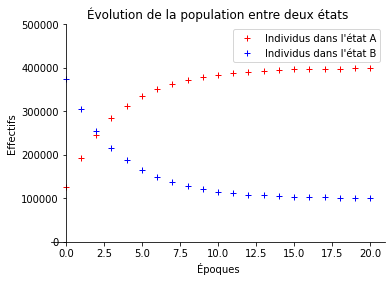

In [ ]:
k = list(range(n+1))
plt.plot(k, a, "+r", label = "Individus dans l'état A")
plt.plot(k, b, "+b", label = "Individus dans l'état B")


# ajustement des paramètres des axes (centrage, couleur, etc.)
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# cosmétique
plt.title("Évolution de la population entre deux états")
plt.xlabel("Époques")
plt.ylabel("Effectifs")
plt.legend()
plt.ylim(0,500000)
plt.show()

* **Conjecture**

Il semble que l'évolution de la population se stabilise autour de 400.000 individus dans l'état A, et 100.000 dans l'état B.

* **Preuve par désentrelacement des deux suites imbriquées**

--> traitement dans le cas général :     
Notons $\tau_1$ la proportion d'individus qui étaient dans l'état A et y restent, et $\tau_2$ la proportion d'individus qui étaient dans l'état A et y restent.

On a alors :

$\left\{\begin{matrix}
 a_{n+1}& = & \tau_1 . a_n & + & (1-\tau_2) . b_n \\
 b_{n+1}& = & (1- \tau_1) . a_n & + & \tau_2 . b_n \\
\end{matrix}\right.$

(Dans notre cas particulier, nous avons : $\tau_1 = 95%$, $tau_2 = 80%$, $a_0 = 125.000$, $b_0 =  500.000 - a_0 = 375.000$)

* On décale $(L_1)$ d'un rang : 
$\begin{matrix}
 a_{n+2}& = & \tau_1 . a_{n+1} & + & (1-\tau_2) . b_{n+1} 
\end{matrix}$ 

* On remplace $b_{n+1}$ par son expression issue de $(L_2)$ : 
$\begin{matrix}
 a_{n+2}& = & \tau_1 . a_{n+1} & + & (1-\tau_2) .  \left ((1- \tau_1) .   a_n  + \tau_2 . b_n \right )
\end{matrix}$ 

* et, grâce à  $(L_2)$,  
$\begin{matrix}
 b_{n}& = & \frac{1}{1 - \tau_2} . \left (a_{n+1} - \tau_1 . a_n \right ) 
\end{matrix}$

* d'où
$\begin{matrix}
 a_{n+2}& = & \tau_1 . a_{n+1} & + & (1-\tau_2) .  \left ((1- \tau_1) .   a_n  + \tau_2 . \frac{1}{1 - \tau_2} . \left (a_{n+1} - \tau_1 . a_n \right ) \right )
\end{matrix}$ 

$\begin{matrix}
 a_{n+2}& = & (\tau_1 + \tau_2 ) . a_{n+1} & + & \left(1 - (\tau_1 + \tau_2) \right ) .   a_n  
\end{matrix}$ 

* Il s'agit d'une **suite récurrente linéaire d'ordre 2**, dont l'équation caractéristique est :     

$\begin{matrix}
 x^2& - & (\tau_1 + \tau_2 ) . x & - & \left(1 - (\tau_1 + \tau_2) \right ) & = & 0 
\end{matrix}$ 

dont le discriminant est :     

$\Delta = \left (-(\tau_1 + \tau_2 ) \right )^2 - 4 . 1 . \left (- \left(1 - (\tau_1 + \tau_2) \right ) \right ) = (\tau_1 + \tau_2 )^2 - 4  \left(\tau_1 + \tau_2 \right ) + 4  = \left ( (\tau_1 + \tau_2 ) - 2  \right )^2$

L'équation caractéristique possède alors deux solutions :
$r_1 = \frac{(\tau_1 + \tau_2 )  -  \left ( (\tau_1 + \tau_2 ) - 2  \right )}{2} = 1$ et $r_2 = \frac{(\tau_1 + \tau_2 )  +  \left ( (\tau_1 + \tau_2 ) - 2  \right )}{2} = (\tau_1 + \tau_2 ) - 1$

On sait qu'alors, il existe e et f tels que, pour tout entier n, 
$a_n = e . r_1^n + f . r_2^n = e + f . (\tau_1 + \tau_2  - 1)^n $

En particulier, 
* pour $n=0$, $e+f = a_0$
* pour $n=1$, $e + f . (\tau_1 + \tau_2  - 1) = a_1$


Par différence, on tire :     $f . (\tau_1 + \tau_2  - 2) = a_1 - a_0 $

or $a_1 = \tau_1 . a_0 + (1 - \tau_2). b_0 = \tau_1 . a_0 + (1 - \tau_2). (N - a_0)$

donc :    $f . (\tau_1 + \tau_2  - 2) = (\tau_1 - 1).a_0 + (1 - \tau_2).(N-a_0) = (\tau_1 + \tau_2  - 2) . a_0 + N (1 - \tau_2)$

et donc : 
$f  = a_0 + N . \frac{1 - \tau_2}{(\tau_1 + \tau_2  - 2)} $

Ensuite, 
$e = a_0 - f = N . \frac{ 1 - \tau_2 }{2 - (\tau_1 + \tau_2)}$

* Reconstituons $a_n$ :    
$a_n = N . \frac{ 1 - \tau_2 }{2 - (\tau_1 + \tau_2)}  + \left (a_0 + N . \frac{1 - \tau_2}{\tau_1 + \tau_2  - 2} \right ) . ((\tau_1 + \tau_2 ) - 1)^n$

* passons à la limite :
Comme $0 <(\tau_1 + \tau_2 ) - 1 <1$ , le dernier terme tend vers 0 quand n tend vers $+\infty$, on a :     

 $\displaystyle \lim_{n \to +\infty} a_n = N . \frac{ 1 - \tau_2 }{2 - (\tau_1 + \tau_2)} $.

 Pour $b_n$, inutile de tout recommencer puisque $b_n = N - a_n$

* Application numérique :     
$\displaystyle \lim_{n \to +\infty} a_n  = 500.000 .  \frac{ 1 - 0.8 }{2 - (0.95 +0.8)} = 500.000 . \frac{ 0.2 }{0.25}  = 500.000 . \frac{ 4 }{5} = 400.000$

et :  $\displaystyle \lim_{n \to +\infty} b_n  = 500.000 - 400.000 = 100.000$

Ceci confirme nos conjectures.

### **Abord probabiliste**

Par « 95% des individus dans l'état A y restent  », on peut comprendre que pour **un** individu dans l'état A, la probabilité qu'il ne change pas d'état est 0.95 .

On traite donc le problème individu par individu, en lui affectant à chaque étape un schéma de Bernoulli : on tire un nombre $u$ au hasard, 
* un individu dans l'état A reste dans l'état A si u < 0.95
* un individu dans l'état B change d'état si u < 0.20

Puis on totalise le nombre d'individus dans l'état A.

L'état des N individus de la population va être modélisé par une liste *liste_etats*, dont la valeur n°k vaudra 1 si l'individu n°k est dans l'état A, 0, sinon.

Il suffit alors de faire la somme des états pour connaître le nombre d'individus dans l'état A.

In [ ]:
import numpy.random as rd
import matplotlib.pyplot as plt

In [ ]:
# initialisation

aa = 0.95
bb = 0.80
N = 500000
a0 = 125000
b0 = N - a0

liste_etats = [1]*a0 + [0]*b0 # liste initiale : a0 individus dans l'état A et b0 individus dans l'état B


In [ ]:
a = sum(liste_etats) # Vérification : nombre initial d'individus dans l'état A
a

125000

In [ ]:
# 40 secondes...
n = 20
a = [a0]
b = [b0]

for _ in range(n) : # étapes
    u = rd.random(N)
    for k in range(N) : # sur toute la population
        if liste_etats[k] == 1 : # Le k-ième individu est dans l'état A
            liste_etats[k] = (u[k]<aa)*1 # il reste dans l'état A si rd < aa
        else : # le k-ième individu est dans  l'état B
            liste_etats[k] = (u[k]<(1-bb))*1 # il passe dans l'état A si rd < 1-bb

    aaa = sum(liste_etats) # nombre d'individu dans l'état A à l'étape k
    bbb = N - aaa
    # stockage des résultats en vue du graphique
    a.append(aaa)
    b.append(bbb)

* **Graphique**

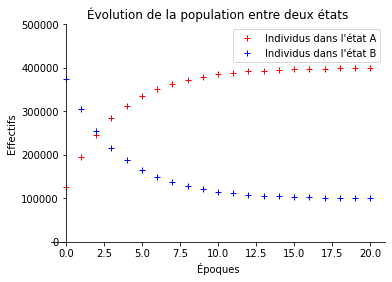

In [ ]:
k = list(range(n+1))
plt.plot(k, a, "+r", label = "Individus dans l'état A")
plt.plot(k, b, "+b", label = "Individus dans l'état B")


# ajustement des paramètres des axes (centrage, couleur, etc.)
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# cosmétique
plt.title("Évolution de la population entre deux états")
plt.xlabel("Époques")
plt.ylabel("Effectifs")
plt.legend()
plt.ylim(0,N)
plt.show()

In [ ]:
print("Nombre d'individus dans l'état A après " + str(n )+ " étapes : " + str(aaa))
print("Nombre d'individus dans l'état B après " + str(n )+ " étapes : " + str(bbb))

Nombre d'individus dans l'état A après 20 étapes : 399189
Nombre d'individus dans l'état B après 20 étapes : 100811


La taille conséquente de la population lisse les effets de fluctuation d'échantillonnage (tester sur une population plus petite si besoin pour faire ressortir ces fluctuations).

L'effet observé par la simulation est très proche de l'évolution théorique déterministe.